# Energy and time resolution at T=298 K and T=104 K

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from scipy.optimize import curve_fit

from crysp import crysp
from scipy.interpolate import interp1d

In [2]:
bc408 = np.array(
    [
        352.23,
        0.01,
        361.47,
        0.02,
        370.06,
        0.04,
        378.12,
        0.06,
        383.76,
        0.08,
        387.78,
        0.10,
        391.41,
        0.12,
        394.71,
        0.14,
        396.65,
        0.17,
        398.42,
        0.19,
        400.27,
        0.23,
        401.48,
        0.27,
        403.29,
        0.29,
        404.30,
        0.32,
        404.70,
        0.33,
        405.67,
        0.35,
        406.32,
        0.39,
        408.73,
        0.51,
        409.46,
        0.56,
        410.55,
        0.59,
        412.36,
        0.61,
        412.96,
        0.63,
        413.57,
        0.65,
        414.37,
        0.67,
        416.19,
        0.74,
        416.79,
        0.77,
        418.60,
        0.81,
        419.61,
        0.84,
        420.82,
        0.87,
        422.59,
        0.90,
        423.72,
        0.93,
        430.08,
        1.00,
        435.72,
        0.95,
        435.92,
        0.92,
        436.93,
        0.90,
        437.58,
        0.87,
        438.95,
        0.85,
        439.15,
        0.80,
        439.75,
        0.79,
        439.95,
        0.76,
        441.77,
        0.69,
        442.37,
        0.66,
        443.91,
        0.63,
        444.18,
        0.61,
        445.79,
        0.58,
        447.41,
        0.56,
        449.02,
        0.53,
        450.95,
        0.50,
        452.64,
        0.48,
        455.06,
        0.45,
        457.40,
        0.42,
        459.09,
        0.40,
        460.70,
        0.38,
        462.31,
        0.36,
        463.92,
        0.34,
        465.13,
        0.32,
        466.74,
        0.29,
        468.35,
        0.27,
        470.77,
        0.24,
        473.99,
        0.22,
        476.41,
        0.20,
        479.23,
        0.17,
        482.86,
        0.15,
        486.48,
        0.13,
        490.51,
        0.11,
        495.75,
        0.09,
        501.79,
        0.07,
        507.13,
        0.05,
        515.08,
        0.03,
        523.95,
        0.02,
        532.81,
        0.01,
    ]
)

bc408 = bc408.reshape(-1, 2)

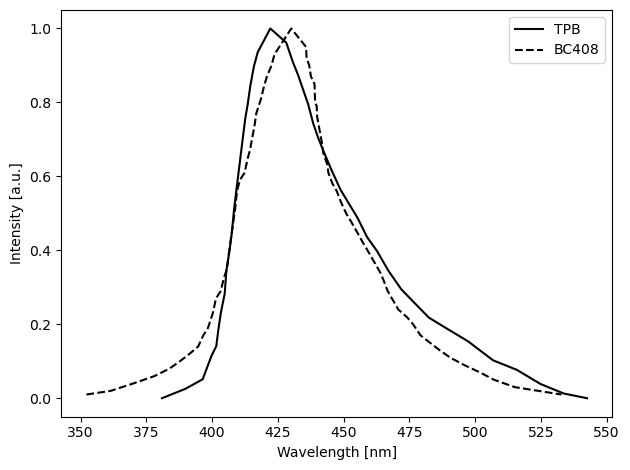

In [3]:
tpb = np.array([
    380.95,
    -0.00,
    389.89,
    0.02,
    396.42,
    0.04,
    399.81,
    0.09,
    401.60,
    0.11,
    402.27,
    0.14,
    403.32,
    0.18,
    404.78,
    0.22,
    405.45,
    0.27,
    406.59,
    0.31,
    407.52,
    0.35,
    408.38,
    0.40,
    409.03,
    0.43,
    409.92,
    0.47,
    410.81,
    0.51,
    411.70,
    0.55,
    412.61,
    0.59,
    413.53,
    0.62,
    414.56,
    0.66,
    415.89,
    0.70,
    417.36,
    0.73,
    422.12,
    0.78,
    428.21,
    0.75,
    430.65,
    0.71,
    432.81,
    0.68,
    434.66,
    0.65,
    436.53,
    0.62,
    438.42,
    0.58,
    440.28,
    0.55,
    442.44,
    0.52,
    445.49,
    0.48,
    448.80,
    0.44,
    452.07,
    0.41,
    455.34,
    0.38,
    458.91,
    0.34,
    462.76,
    0.31,
    466.90,
    0.27,
    471.89,
    0.23,
    477.12,
    0.20,
    482.42,
    0.17,
    488.33,
    0.15,
    497.32,
    0.12,
    506.80,
    0.08,
    515.79,
    0.06,
    524.86,
    0.03,
    533.66,
    0.01,
    542.55,
    -0.00,
])

tpb = tpb.reshape(-1, 2)
fig, ax = plt.subplots(1,1,tight_layout=True)
ax.plot(tpb[:,0], tpb[:,1]/np.max(tpb[:,1]), label='TPB', lw=1.5, c='k')
ax.plot(bc408[:,0], bc408[:,1]/np.max(bc408[:,1]), label='BC408', lw=1.5, c='k', ls='--')
ax.legend()
ax.set_xlabel('Wavelength [nm]')
ax.set_ylabel('Intensity [a.u.]')
fig.savefig('tpb_bc408.pdf')

In [4]:
bc408_qe = np.average(f_sipm_qe_6x6(bc408[:,0]), weights=bc408[:,1])


NameError: name 'f_sipm_qe_6x6' is not defined

In [5]:
bc408_qe

NameError: name 'bc408_qe' is not defined

In [6]:
import importlib
importlib.reload(crysp)

<module 'crysp.crysp' from '/Users/roberto/crysp/crysp/crysp.py'>

In [7]:
time_fibers, ch2, ch3 = crysp.read_file("fiber_plastic_scint_roomT_noWLS_Am_10012024_2.zip")

In [8]:
np.mean(np.trapz(ch3, axis=1, x=time_fibers)+0.35e-9)/(np.mean(np.trapz(ch2, axis=1, x=time_fibers)+0.45e-8)/0.5)*100

3.4970604136867243

In [9]:
calib = 2.75e-8/(5480/26)
calib*60

7.828467153284671e-09

In [10]:
10000*0.06/2*1.6e-19*50*4e6

9.6e-09

In [11]:
crysp.gauss
importlib.reload(crysp)
from scipy.optimize import curve_fit

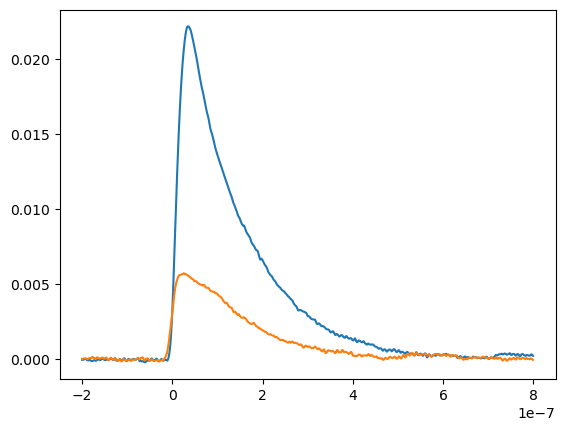

In [13]:
charge = np.trapz(ch3, axis=1, x=time_fibers)
fig, ax = plt.subplots(1,1)
ax.plot(time_fibers, ch3[charge>3.e-9][4])
ax.plot(time_fibers, ch3[charge<2e-9][9])

1.040525318820553 16.102600930404993


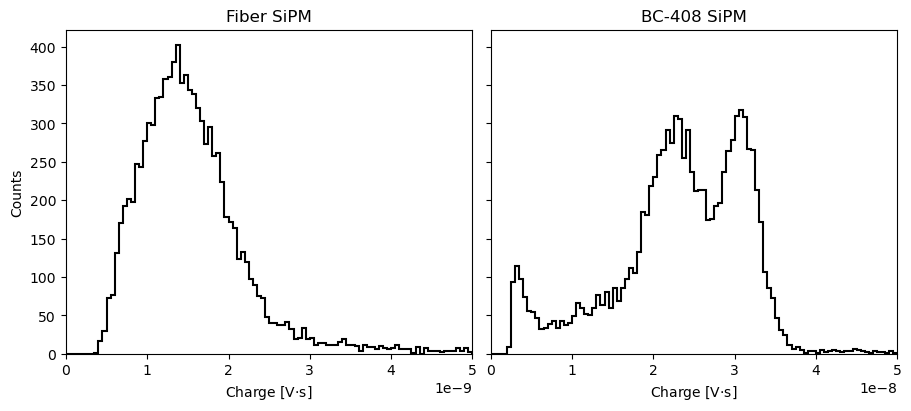

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(9, 4), constrained_layout=True, sharey=True)
_ = ax[0].hist(
    np.trapz(ch3, axis=1, x=time_fibers),
    bins=100,
    histtype="step",
    range=(0, 5e-9),
    color="k",
    lw=1.5,
)
n, bins, patches = ax[1].hist(
    np.trapz(ch2, axis=1, x=time_fibers),
    bins=100,
    histtype="step",
    color='k',
    lw=1.5,
    range=(0, 0.5e-7),
)
bin_centers = bins[:-1] + np.diff(bins) / 2
popt, pcov = curve_fit(crysp.two_gauss, bin_centers[bin_centers>2.5e-8], n[bin_centers>2.5e-8], p0=[300, 300, 2.5e-8, 3.5e-8, 0.1e-8, 0.1e-8])
print(popt[2]/popt[4], popt[3]/popt[5])
xx = np.linspace(0,5e-8,100)
# ax[1].plot(xx, crysp.two_gauss(xx, *popt), color='r', lw=1.5)
# popt, pcov = curve_fit(crysp.gauss, bin_centers[(bin_centers>2.5e-8)&(bin_centers<3e-8)], n[(bin_centers>2.5e-8)&(bin_centers<3e-8)], p0=[300, 2.5e-8, 1e-8])
# print(popt[2]/popt[1])
# ax[1].plot(xx, crysp.gauss(xx, *popt), color='r', lw=1.5)
# ax[1].axvline(2.75e-8+60*calib+0.45e-8, color='r')
# ax[1].axvline(calib * 5480 / 26, color="r")
# ax[1].axvline(calib * 5480 / 26 + calib * 60, color="r")
# ax[1].hlines([0, 300], calib * 5480 / 26, calib * 5480 / 26 + calib * 60, color="k", ls='--')
# ax[1].hlines([0, 100], 0, calib*60, color="k", ls='--')

# ax[1].axvline(calib * 60, color="r")
# ax[1].text(calib * 30, 130, r"60 keV $\gamma$", fontsize='large')
# ax[1].text(calib * 3980 / 26, 330, r"5.4 MeV $\alpha$", fontsize='large')
# ax[1].text(calib * 6280 / 26, 340, r"""5.4 MeV $\alpha$
# + 60 keV $\gamma$""", fontsize='large')

ax[0].set_title("Fiber SiPM")
ax[1].set_title("BC-408 SiPM")
ax[0].set_xlabel("Charge [V$\cdot$s]")
ax[1].set_xlabel("Charge [V$\cdot$s]")
ax[0].set_ylabel("Counts")
ax[0].set_xlim(0, 5e-9)
ax[1].set_xlim(0, 5e-8)
fig.savefig("fibers.pdf")
# ax[1].axvline(calib*60, color='r')
# ax[1].axvline(8e-9, color='r')

In [15]:
mpl.rcParams.update({
    "font.family": "serif",
    "axes.titlesize": "xx-large",
    "axes.labelsize": "xx-large",
    "xtick.labelsize": "x-large",
    "ytick.labelsize": "x-large",
    "legend.fontsize": "large",
    "figure.titlesize": "xx-large",
    "legend.frameon": False,
    "text.usetex": True
})

In [16]:
csi_warm = np.array(
    [
        250.602,
        0.084,
        269.277,
        0.333,
        280.723,
        0.491,
        287.349,
        0.746,
        303.012,
        0.877,
        314.458,
        0.895,
        330.120,
        0.658,
        348.795,
        0.302,
        386.747,
        0.077,
        449.398,
        0.077,
    ]
)

csi_cold = np.array(
    [
        460,
        0.04,
        400,
        0.10,
        380,
        0.29,
        340,
        0.67,
        320,
        0.88,
        300,
        0.29,
        280,
        0.10,
        260,
        0.02,
    ]
)


csi_warm = csi_warm.reshape(-1, 2)
csi_cold = csi_cold.reshape(-1, 2)

In [17]:
sipm_qe_6x6 = np.array([
    0,
    0.,
    200.,
    0.,
    277.94,
    0.03,
    282.92,
    0.16,
    300.17,
    0.29,
    337.06,
    0.36,
    353.27,
    0.36,
    383.25,
    0.44,
    445.90,
    0.50,
    489.31,
    0.49,
    614.93,
    0.29,
    729.04,
    0.15,
    884.59,
    0.04,
    1000.00,
    0.00,
    np.inf,
    0
])

sipm_qe_6x6 = sipm_qe_6x6.reshape(-1, 2)
f_sipm_qe_6x6 = interp1d(sipm_qe_6x6[:, 0], sipm_qe_6x6[:, 1])


In [18]:
csi_warm_qe = np.average(f_sipm_qe_6x6(csi_warm[:,0]), weights=csi_warm[:,1])
csi_cold_qe = np.average(f_sipm_qe_6x6(csi_cold[:,0]), weights=csi_cold[:,1])

In [19]:
csi_cold_qe, csi_warm_qe

(0.3400166515053472, 0.25496949748598124)

In [20]:
import pandas as pd
mc_6x6_warm = pd.read_hdf("mc_6x6_warm_lut.h5", "MC/sns_response")
mc_3x3_warm_davis = pd.read_hdf("mc_3x3_warm_davis.h5", "MC/sns_response")
mc_3x3_warm = pd.read_hdf("mc_3x3_warm_lut.h5", "MC/sns_response")
mc_3x3_cold = pd.read_hdf("mc_3x3_cold.h5", "MC/sns_response")
mc_3x3_cold_davis = pd.read_hdf("mc_3x3_cold_davis.h5", "MC/sns_response")

mc_6x6_warm_davis = pd.read_hdf("mc_6x6_warm_davis.h5", "MC/sns_response")

In [21]:
lut_3x3 = 45
lut_6x6 = 175
davis_3x3 = 110
davis_6x6 = 280

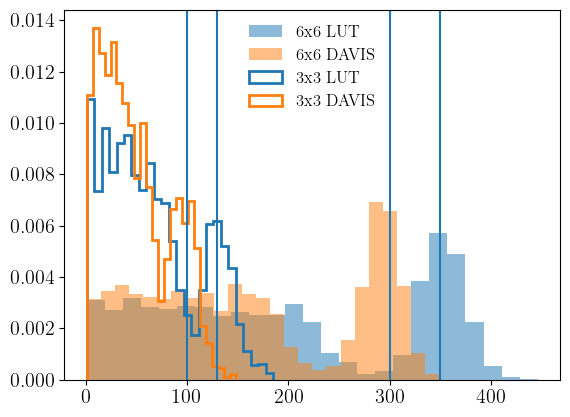

In [22]:
fig, ax = plt.subplots(1, 1)
ax.hist(
    mc_6x6_warm.groupby("event_id")["charge"].sum(),
    bins=25,
    density=True,
    label="6x6 LUT",
    alpha=0.5,
)
ax.hist(
    mc_6x6_warm_davis.groupby("event_id")["charge"].sum(),
    bins=25,
    density=True,
    alpha=0.5,
    label="6x6 DAVIS",
)
ax.hist(
    mc_3x3_warm.groupby("event_id")["charge"].sum(),
    bins=25,
    density=True,
    label="3x3 LUT",
    histtype="step",
    lw=2,
    color="tab:blue",
)
ax.hist(
    mc_3x3_warm_davis.groupby("event_id")["charge"].sum(),
    bins=25,
    density=True,
    label="3x3 DAVIS",
    histtype="step",
    lw=2,
    color="tab:orange",
)
ax.legend()
ax.axvline(350)
ax.axvline(130)
ax.axvline(100)
ax.axvline(300)

## T = 298 K

### 3x3x20 mm$^3$ crystals

In [23]:
time_warm, left_warm, right_warm = crysp.read_file("warm_coincidence_no_gel_done.zip")

In [24]:
baselines_left = np.average(left_warm[:, :2000], axis=1)[:, None]
baselines_right = np.average(right_warm[:, :2000], axis=1)[:, None]
integral_left_3x3 = np.trapz(
    (left_warm)[:, time_warm > -1e-7], x=time_warm[time_warm > -1e-7]
)
integral_right_3x3 = np.trapz(
    (right_warm)[:, time_warm > -1e-7], x=time_warm[time_warm > -1e-7]
)

Text(0.5, 1.0, 'Right SiPM')

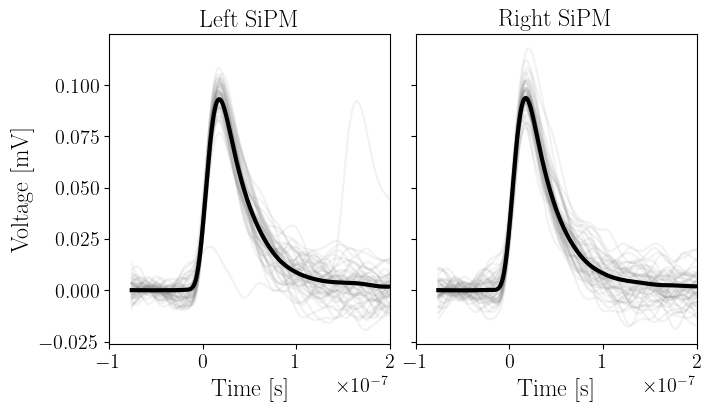

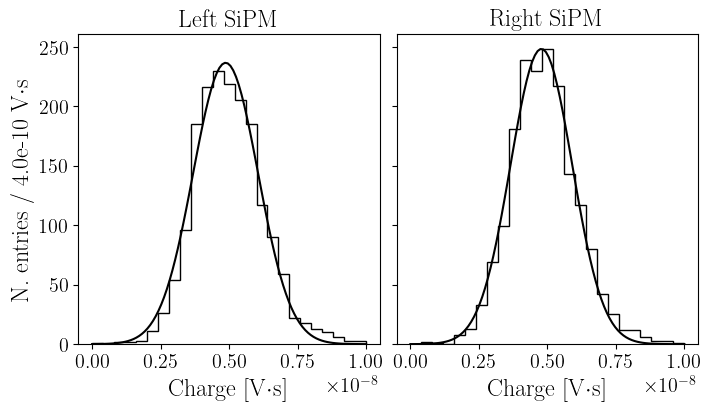

In [25]:
time_right, right = crysp.read_single_crystal(f"single_right_warm_done.zip", ticks_column=1)
time_left, left = crysp.read_single_crystal(f"single_left_warm_done.zip", ticks_column=1)

left, average_left = crysp.baseline_subtract(time_left, left, top=0.2)
right, average_right = crysp.baseline_subtract(time_right, right, top=0.2)
integration_range = (time_left > -1e-7) & (time_left < 2e-7)

fig, ax = plt.subplots(
    1, 2, constrained_layout=True, sharex=True, sharey=True, figsize=(7, 4)
)
_ = ax[0].plot(time_left, left[:50, :].T, alpha=0.1, c="gray")
_ = ax[0].plot(time_left, average_left, c="k", lw=3)
ax[0].set_xlim(-1e-7, 2e-7)

_ = ax[1].plot(time_right, right[:50, :].T, alpha=0.1, c="gray")
_ = ax[1].plot(time_right, average_right, c="k", lw=3)

ax[0].set_xlabel("Time [s]", fontsize='xx-large')
ax[1].set_xlabel("Time [s]")
ax[0].set_ylabel("Voltage [mV]")
ax[0].set_title("Left SiPM")
ax[1].set_title("Right SiPM")

# fig.suptitle(f"SPE at {temp:.2f} K", fontsize="xx-large")

fig, ax = plt.subplots(
    1, 2, constrained_layout=True, sharex=True, sharey=True, figsize=(7, 4)
)
integral_left_sipm = np.trapz(left[:, integration_range], x=time_left[integration_range], axis=1)
n_left, bins, patches = ax[0].hist(
    integral_left_sipm,
    bins=25,
    histtype="step",
    color="k",
    range=(0e-8, 1.e-8),
)
integral_right_sipm = np.trapz(right[:, integration_range], x=time_right[integration_range], axis=1)
n_right, bins, patches = ax[1].hist(
    integral_right_sipm,
    bins=25,
    histtype="step",
    range=(0e-8, 1.e-8),
    color="k",
)
bin_centers = (bins[:-1] + bins[1:]) / 2
p_left_3x3, pcov_left = curve_fit(crysp.gauss, bin_centers, n_left, p0=(max(n_left), np.mean(integral_left_sipm), np.std(integral_left_sipm)))
xx = np.linspace(0, 1.e-8, 100)
ax[0].plot(xx, crysp.gauss(xx, *p_left_3x3), c="k")
p_right_3x3, pcov_right = curve_fit(crysp.gauss, bin_centers, n_right, p0=(max(n_right), np.mean(integral_right_sipm), np.std(integral_right_sipm)))
ax[1].plot(xx, crysp.gauss(xx, *p_right_3x3), c="k")
# fig.suptitle(f"SPE at {temp:.2f} K")
ax[0].set_ylabel(
    f"N. entries / {bins[1]-bins[0]:.1e} V$\cdot$s"
)
ax[0].set_xlabel("Charge [V$\cdot$s]")
ax[1].set_xlabel("Charge [V$\cdot$s]")
ax[0].set_title("Left SiPM")
ax[1].set_title("Right SiPM")

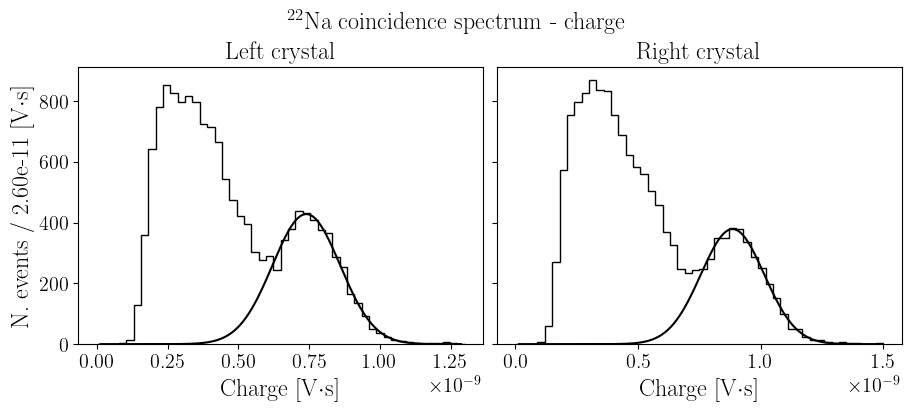

In [26]:
fig, ax, popt_left, pcov_left, popt_right, pcov_right = crysp.charge_spectra(
    integral_left_3x3, integral_right_3x3, (0, 1.3e-9), (0, 1.5e-9), 0.6e-9, 0.8e-9
)

In [50]:
lut_charge_3x3 = mc_3x3_warm.groupby("event_id")["charge"].sum()
lut_charge_3x3 += np.random.poisson(0.8, size=lut_charge_3x3.shape)
smeared_lut_3x3 = np.random.normal(lut_charge_3x3, np.sqrt(0.78*lut_charge_3x3))


In [74]:
plt.rcParams['legend.title_fontsize'] = 'x-large'

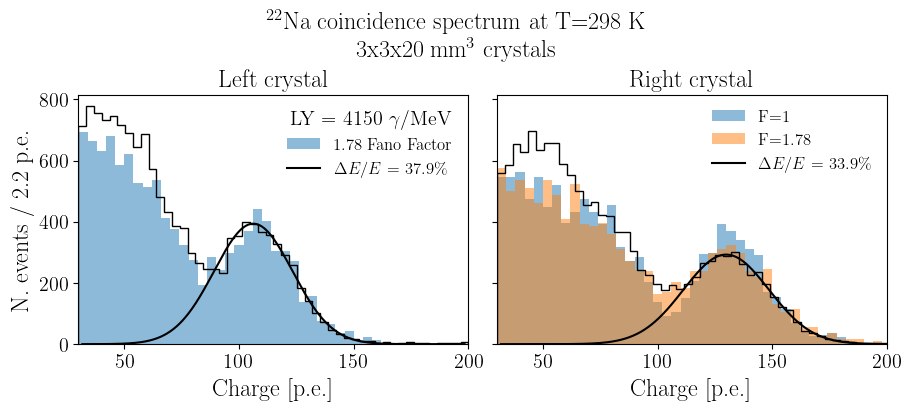

In [76]:
left_energy = integral_left_3x3 / (p_left_3x3[1] / 700)
right_energy = integral_right_3x3 / (p_right_3x3[1] / 700)

(
    fig,
    ax,
    popt_left_charge_3x3,
    pcov_left_charge,
    popt_right_charge_3x3,
    pcov_right_charge,
) = crysp.charge_spectra(
    left_energy, right_energy, left_range=(30, 200), right_range=(30, 200), fit_left=100, fit_right=110
)
ax[0].set_xlabel("Charge [p.e.]")
ax[1].set_xlabel("Charge [p.e.]")
ax[0].set_ylabel("N. events / 2.2 p.e.")
ax[0].hist(
    smeared_lut_3x3 * 0.83,
    bins=50,
    # density=True,
    weights=np.ones_like(smeared_lut_3x3) * 4.75,
    alpha=0.5,
    label=rf'''1.78 Fano Factor''',
    range=(30, 230)
)
ax[1].hist(
    lut_charge_3x3,
    bins=50,
    # density=True,
    weights=np.ones_like(smeared_lut_3x3) * 4.4,
    alpha=0.5,
    label=r'''F=1''',
    range=(30, 230)
)
ax[1].hist(
    smeared_lut_3x3,
    bins=50,
    # density=True,
    weights=np.ones_like(smeared_lut_3x3) * 4.4,
    alpha=0.5,
    label=r'''F=1.78''',
    range=(30, 230)
)

ax[0].set_xlim(30,200)
ax[1].set_xlim(30,200)
ax[0].plot(np.nan, np.nan, label=rf'$\Delta E / E$ = {popt_left_charge_3x3[2]/popt_left_charge_3x3[1]*100*2.355:.3g}\%%', c='k')
ax[1].plot(np.nan, np.nan, label=rf'$\Delta E / E$ = {popt_right_charge_3x3[2]/popt_right_charge_3x3[1]*100*2.355:.3g}\%%', c='k')
ax[0].legend(title=rf'''LY = {5000*0.83:.0f} $\gamma$/MeV''')
# plt.setp(l.get_title(),fontsize='xx-large')

ax[1].legend(title=rf'''LY = {5000*1:.0f} $\gamma$/MeV''')
# plt.setp(l.get_title(),fontsize='xx-large')

ax[1].legend()
fig.suptitle(r"""$^{22}$Na coincidence spectrum at T=298 K
3x3x20 mm$^3$ crystals""")
fig.savefig("crystals_3x3.pdf")

### 6x6x20 mm$^3$ crystals

In [26]:
time_warm, left_warm, right_warm = crysp.read_file("csi_6x6_warm.zip")

In [45]:
baselines_left = np.average(left_warm[:, :2000], axis=1)[:, None]
baselines_right = np.average(right_warm[:, :2000], axis=1)[:, None]
integral_left_6x6 = np.trapz(
    (left_warm)[:, time_warm > -1e-7], x=time_warm[time_warm > -1e-7]
)
integral_right_6x6 = np.trapz(
    (right_warm)[:, time_warm > -1e-7], x=time_warm[time_warm > -1e-7]
)

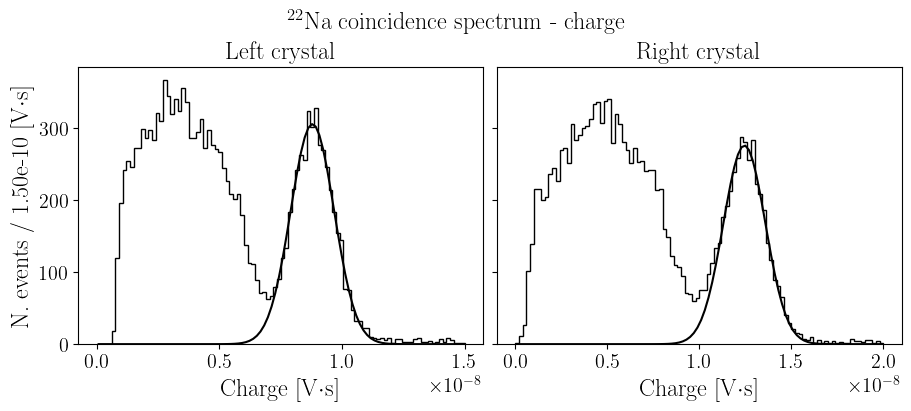

In [46]:
fig, ax, popt_left, pcov_left, popt_right, pcov_right = crysp.charge_spectra(
    integral_left_6x6, integral_right_6x6, (0, 1.5e-8), (0, 2e-8), 0.7e-8, 1.1e-8
)

Text(0.5, 1.0, 'Right SiPM')

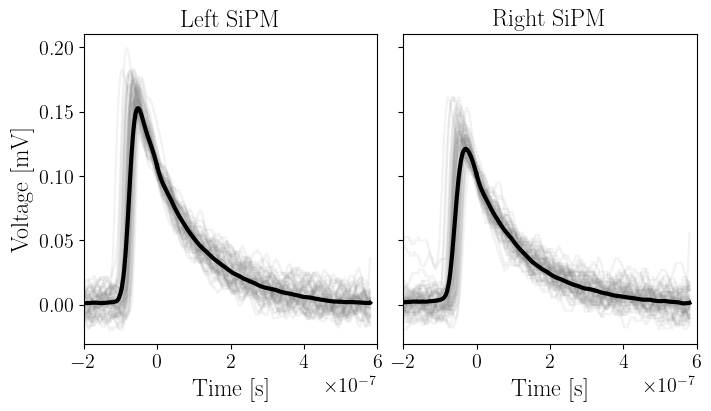

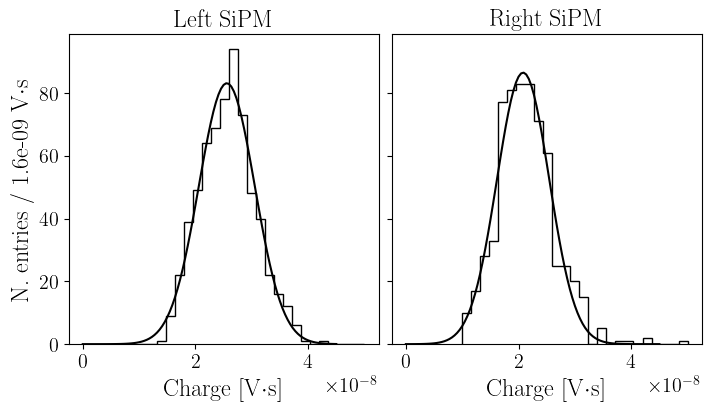

In [779]:
time_right, right = crysp.read_single_crystal(
    f"right_SiPM_roomT_spe_6x6.zip", ticks_column=1
)
time_left, left = crysp.read_single_crystal(
    f"left_SiPM_roomT_spe_6x6.zip", ticks_column=1
)

left, average_left = crysp.baseline_subtract(time_left, left, top=0.2)
right, average_right = crysp.baseline_subtract(time_right, right, top=0.2)
integration_range = (time_left > -2e-7) & (time_left < 6e-7)

fig, ax = plt.subplots(
    1, 2, constrained_layout=True, sharex=True, sharey=True, figsize=(7, 4)
)
_ = ax[0].plot(time_left, left[:50, :].T, alpha=0.1, c="gray")
_ = ax[0].plot(time_left, average_left, c="k", lw=3)
ax[0].set_xlim(-2e-7, 6e-7)

_ = ax[1].plot(time_right, right[:50, :].T, alpha=0.1, c="gray")
_ = ax[1].plot(time_right, average_right, c="k", lw=3)

ax[0].set_xlabel("Time [s]", fontsize="xx-large")
ax[1].set_xlabel("Time [s]")
ax[0].set_ylabel("Voltage [mV]")
ax[0].set_title("Left SiPM")
ax[1].set_title("Right SiPM")

# fig.suptitle(f"SPE at {temp:.2f} K", fontsize="xx-large")

fig, ax = plt.subplots(
    1, 2, constrained_layout=True, sharex=True, sharey=True, figsize=(7, 4)
)
integral_left_sipm = np.trapz(
    left[:, integration_range], x=time_left[integration_range], axis=1
)
n_left, bins, patches = ax[0].hist(
    integral_left_sipm,
    bins=25,
    histtype="step",
    color="k",
    range=(1e-8, 5e-8),
)
integral_right_sipm = np.trapz(
    right[:, integration_range], x=time_right[integration_range], axis=1
)
n_right, bins, patches = ax[1].hist(
    integral_right_sipm,
    bins=25,
    histtype="step",
    range=(1e-8, 5e-8),
    color="k",
)
bin_centers = (bins[:-1] + bins[1:]) / 2
p_left_6x6, pcov_left = curve_fit(
    crysp.gauss,
    bin_centers,
    n_left,
    p0=(max(n_left), np.mean(integral_left_sipm), np.std(integral_left_sipm)),
)
xx = np.linspace(0, 4.5e-8, 100)
ax[0].plot(xx, crysp.gauss(xx, *p_left_6x6), c="k")
p_right_6x6, pcov_right = curve_fit(
    crysp.gauss,
    bin_centers,
    n_right,
    p0=(max(n_right), np.mean(integral_right_sipm), np.std(integral_right_sipm)),
)
ax[1].plot(xx, crysp.gauss(xx, *p_right_6x6), c="k")
# fig.suptitle(f"SPE at {temp:.2f} K")
ax[0].set_ylabel(f"N. entries / {bins[1]-bins[0]:.1e} V$\cdot$s")
ax[0].set_xlabel("Charge [V$\cdot$s]")
ax[1].set_xlabel("Charge [V$\cdot$s]")
ax[0].set_title("Left SiPM")
ax[1].set_title("Right SiPM")

In [69]:
p_right_6x6[1] / 1.6e-19 / 50 / 4e6, p_right_3x3[1] / 1.6e-19 / 50 / 7e5

(650.4119397875754, 854.1582667260531)

In [468]:
lut_charge_6x6 = mc_6x6_warm.groupby("event_id")["charge"].sum()
lut_charge_6x6 += np.random.poisson(4, size=lut_charge_6x6.shape) # dark noise

smeared_lut_6x6 = np.random.normal(lut_charge_6x6, 0.075 * lut_charge_6x6)
# smeared_nues = np.random.normal(nue_events[nue_events>17.3], 0.15 / np.sqrt(nue_events[nue_events>17.3]) * nue_events[nue_events>17.3])


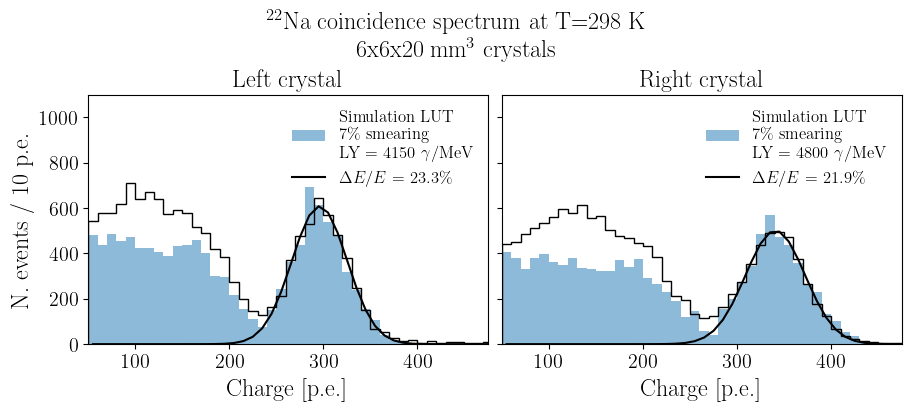

In [473]:
left_energy = integral_left_6x6 / (p_right_6x6[1] / 700)
right_energy = integral_right_6x6 / (p_left_6x6[1] / 700)

(
    fig,
    ax,
    popt_left_charge_6x6,
    pcov_left_charge,
    popt_right_charge_6x6,
    pcov_right_charge,
) = crysp.charge_spectra(
    left_energy, right_energy, left_range=(50, 550), right_range=(50, 550), fit_left=250, fit_right=300
)
ax[0].set_xlabel("Charge [p.e.]")
ax[1].set_xlabel("Charge [p.e.]")
# ax[1].hist(
#     mc_6x6_warm.groupby("event_id")["charge"].sum(),
#     bins=50,
#     # density=True,
#     label="6x6 LUT",
#     alpha=0.5
# )
ax[1].hist(
    smeared_lut_6x6*0.96,
    bins=50,
    # density=True,
    range=(50, 550),
    weights=np.ones_like(smeared_lut_6x6) * 3.0,
    label=rf'''Simulation LUT
7\% smearing
LY = {0.96*5000:.0f} $\gamma$/MeV''',
    alpha=0.5
)
ax[0].hist(
    smeared_lut_6x6*0.83,
    bins=50,
    # density=True,
    range=(50, 550),
    weights=np.ones_like(smeared_lut_6x6) * 3.2,
    alpha=0.5,
    label=rf'''Simulation LUT
7\% smearing
LY = {0.83*5000:.0f} $\gamma$/MeV'''
)
ax[0].set_ylabel("N. events / 10 p.e.")
ax[0].set_xlim(50, 475)
ax[1].set_xlim(50, 475)
ax[0].plot(np.nan, np.nan, label=rf'$\Delta E / E$ = {popt_left_charge_6x6[2]/popt_left_charge_6x6[1]*100*2.355:.3g}\%%', c='k')
ax[1].plot(np.nan, np.nan, label=rf'$\Delta E / E$ = {popt_right_charge_6x6[2]/popt_right_charge_6x6[1]*100*2.355:.3g}\%%', c='k')
ax[1].legend()
ax[0].legend()
ax[1].set_ylim(0, 1100)
fig.suptitle(r"""$^{22}$Na coincidence spectrum at T=298 K
6x6x20 mm$^3$ crystals""")
fig.savefig("crystals_6x6.pdf")

In [73]:
popt_left_charge_6x6[1] / (popt_left_charge_3x3[1]), popt_right_charge_6x6[1] / (popt_right_charge_3x3[1])

(2.27259440332681, 2.1570532902777386)

### Time resolution

In [7]:
left_times, right_times = crysp.time_resolution(
    time_warm,
    left_warm - baselines_left,
    right_warm - baselines_right,
    left_energy,
    right_energy,
    np.std(baselines_left) * 12,
    np.std(baselines_right) * 12,
    popt_left_energy[2],
    popt_right_energy[2],
    (-2e-7, 0.2e-7),
)

100%|██████████| 1494/1494 [00:00<00:00, 23153.00it/s]


Text(0.5, 1.0, 'Time resolution at T=298 K')

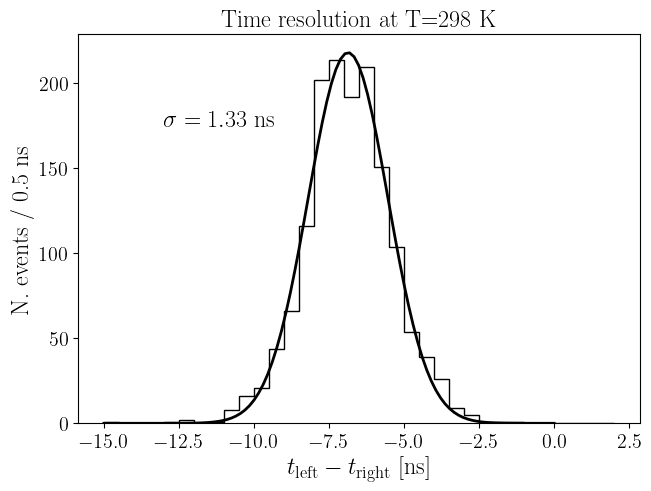

In [8]:
time_diff = left_times-right_times
fig, ax = plt.subplots(1,1,constrained_layout=True)
n, bins, patches = ax.hist(time_diff*1e9,
                           bins=np.linspace(-15,2,35),
                           histtype='step',
                           color='k')
bin_centers = (bins[:-1] + bins[1:]) / 2
popt_time, pcov_time = curve_fit(
    crysp.gauss,
    bin_centers,
    n,
    p0=(150, -9, 0.5),
)
xx = np.linspace(-15, 0, 100)
ax.plot(xx, crysp.gauss(xx, *popt_time),c='k')
ax.text(popt_time[1]*1.9, popt_time[0]*0.8, rf"$\sigma={popt_time[2]:.2f}$ ns", fontsize='xx-large')
ax.set_xlabel(r"$t_{\mathrm{left}}-t_{\mathrm{right}}$ [ns]")
ax.set_ylabel(f"N. events / {bins[1]-bins[0]:.2g} ns")
ax.set_title("Time resolution at T=298 K")

## T=104 K

Text(0.5, 1.0, 'Right SiPM')

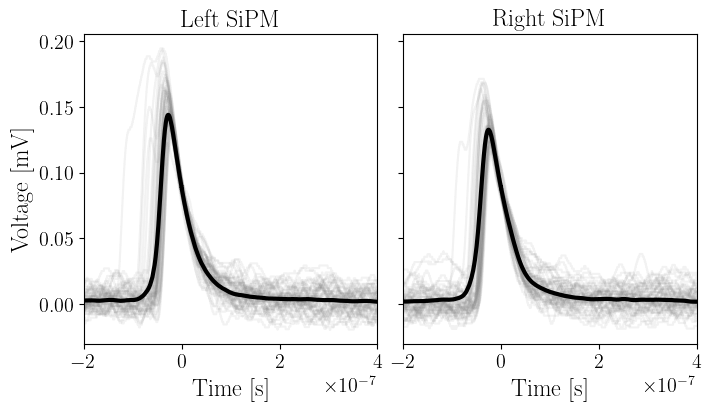

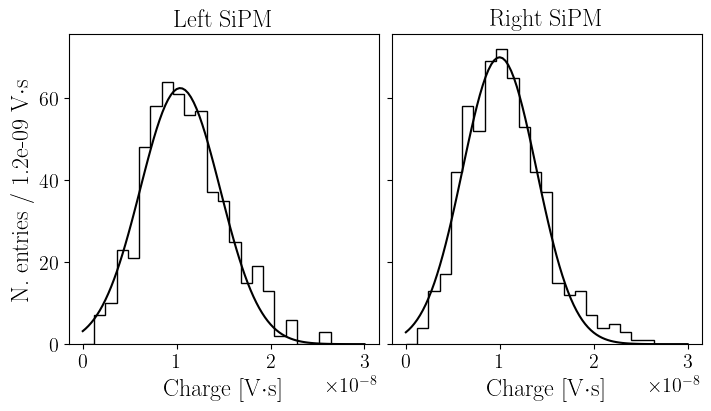

In [84]:
time_right, right = crysp.read_single_crystal(
    f"sp_right_T-160.9_20231006.zip", ticks_column=1
)
time_left, left = crysp.read_single_crystal(
    f"sp_leftSiPM_T-162.7_20231006.zip", ticks_column=1
)

left, average_left = crysp.baseline_subtract(time_left, left, top=0.2)
right, average_right = crysp.baseline_subtract(time_right, right, top=0.2)
integration_range = (time_left > -2e-7) & (time_left < 4e-7)
integration_range_right = (time_right > -2e-7) & (time_right < 4e-7)

fig, ax = plt.subplots(
    1, 2, constrained_layout=True, sharex=True, sharey=True, figsize=(7, 4)
)
_ = ax[0].plot(time_left, left[:50, :].T, alpha=0.1, c="gray")
_ = ax[0].plot(time_left, average_left, c="k", lw=3)
ax[0].set_xlim(-2e-7, 4e-7)

_ = ax[1].plot(time_right, right[:50, :].T, alpha=0.1, c="gray")
_ = ax[1].plot(time_right, average_right, c="k", lw=3)

ax[0].set_xlabel("Time [s]", fontsize="xx-large")
ax[1].set_xlabel("Time [s]")
ax[0].set_ylabel("Voltage [mV]")
ax[0].set_title("Left SiPM")
ax[1].set_title("Right SiPM")

# fig.suptitle(f"SPE at {temp:.2f} K", fontsize="xx-large")

fig, ax = plt.subplots(
    1, 2, constrained_layout=True, sharex=True, sharey=True, figsize=(7, 4)
)
integral_left_sipm = np.trapz(
    left[:, integration_range], x=time_left[integration_range], axis=1
)
n_left, bins, patches = ax[0].hist(
    integral_left_sipm,
    bins=25,
    histtype="step",
    color="k",
    range=(0e-8, 3e-8),
)
integral_right_sipm = np.trapz(
    right[:, integration_range_right], x=time_right[integration_range_right], axis=1
)
n_right, bins, patches = ax[1].hist(
    integral_right_sipm,
    bins=25,
    histtype="step",
    range=(0e-8, 3e-8),
    color="k",
)
bin_centers = (bins[:-1] + bins[1:]) / 2
p_left_6x6, pcov_left = curve_fit(
    crysp.gauss,
    bin_centers,
    n_left,
    p0=(max(n_left), np.mean(integral_left_sipm), np.std(integral_left_sipm)),
)
xx = np.linspace(0, 3e-8, 100)
ax[0].plot(xx, crysp.gauss(xx, *p_left_6x6), c="k")
p_right_6x6, pcov_right = curve_fit(
    crysp.gauss,
    bin_centers,
    n_right,
    p0=(max(n_right), np.mean(integral_right_sipm), np.std(integral_right_sipm)),
)
ax[1].plot(xx, crysp.gauss(xx, *p_right_6x6), c="k")
# fig.suptitle(f"SPE at {temp:.2f} K")
ax[0].set_ylabel(f"N. entries / {bins[1]-bins[0]:.1e} V$\cdot$s")
ax[0].set_xlabel("Charge [V$\cdot$s]")
ax[1].set_xlabel("Charge [V$\cdot$s]")
ax[0].set_title("Left SiPM")
ax[1].set_title("Right SiPM")

In [78]:
# time_cold, right_cold, left_cold = crysp.read_file("na22_20230725_afternoon.zip")
time_cold, right_cold, left_cold = crysp.read_file("csi_20231006_t-162.5.zip")
# left_cold = -left_cold
# right_cold = -right_cold

In [79]:
baselines_left_cold = np.average(left_cold[:, :500], axis=1)[:, None]
baselines_right_cold = np.average(right_cold[:, :500], axis=1)[:, None]
integral_left_cold = np.trapz(
    (left_cold)[:, time_cold > -0.5e-6], x=time_cold[time_cold > -0.5e-6]
)
integral_right_cold = np.trapz(
    (right_cold)[:, time_cold > -0.5e-6], x=time_cold[time_cold > -0.5e-6]
)

### Energy resolution

In [80]:
importlib.reload(crysp)

<module 'crysp.crysp' from '/Users/roberto/crysp/crysp/crysp.py'>

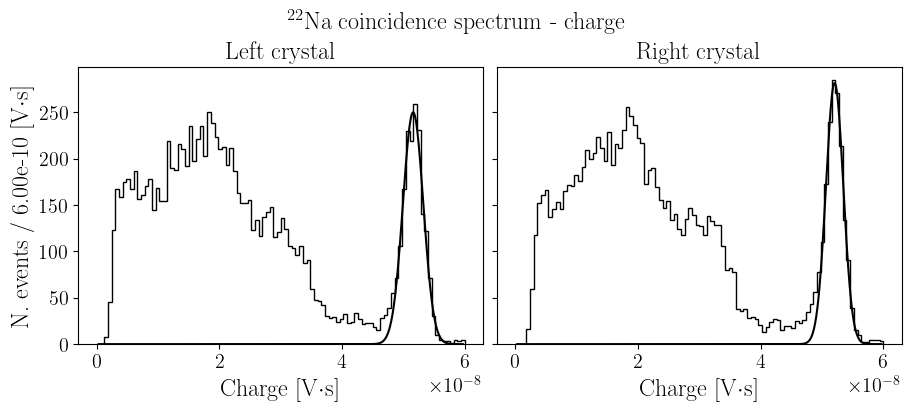

In [81]:
fig, ax, popt_left_cold, pcov_left_cold, popt_right_cold, pcov_right_cold = crysp.charge_spectra(
    integral_left_cold, integral_right_cold, (0,6e-8), (0, 6e-8), 5e-8, 5e-8, n_bins=100
)

In [82]:
importlib.reload(crysp)

<module 'crysp.crysp' from '/Users/roberto/crysp/crysp/crysp.py'>

In [133]:
cold_lut_3x3_charge = mc_3x3_cold.groupby("event_id")["charge"].sum()
cold_smeared_lut_3x3 = np.random.normal(cold_lut_3x3_charge, np.sqrt(0.8*cold_lut_3x3_charge))


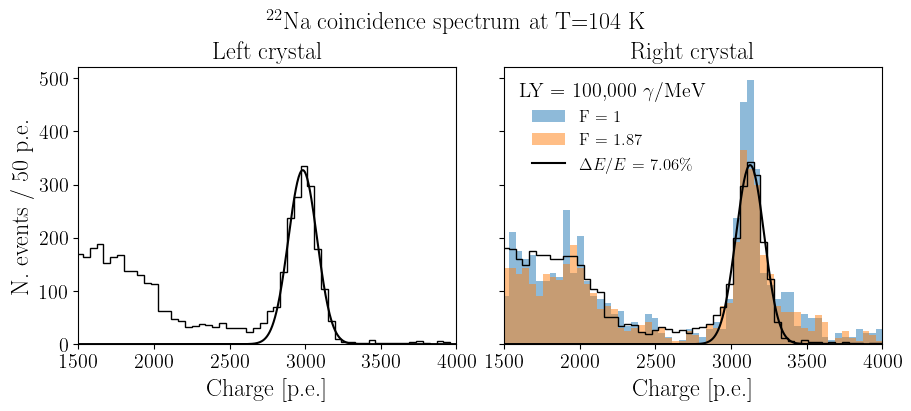

In [136]:
left_energy_cold = integral_left_cold / p_left_6x6[1] * 600
right_energy_cold = integral_right_cold / p_right_6x6[1] * 600

(
    fig,
    ax,
    popt_left_energy_cold_3x3,
    pcov_left_energy_cold,
    popt_right_energy_cold_3x3,
    pcov_right_energy_cold,
) = crysp.charge_spectra(
    left_energy_cold, right_energy_cold, left_range=(0, 4500), right_range=(0, 4500), fit_left=2800, fit_right=2800, n_bins=100
)
ax[0].set_xlabel("Charge [p.e.]")
ax[1].set_xlabel("Charge [p.e.]")
ax[0].set_ylabel("N. events / 50 p.e.")
ax[0].set_xlim(1500,4000)
ax[1].set_xlim(1500,4000)
ax[1].hist(
    cold_lut_3x3_charge*1.01,
    bins=100,
    label="F = 1",
    alpha=0.5,
    range=(0,4500),
    weights=np.ones_like(mc_3x3_cold.groupby("event_id")["charge"].sum())*7
)
ax[1].hist(
    cold_smeared_lut_3x3*1.01,
    bins=100,
    label="F = 1.87",
    alpha=0.5,
    range=(0,4500),
    weights=np.ones_like(mc_3x3_cold.groupby("event_id")["charge"].sum())*6
)
ax[1].plot(np.nan, np.nan, label=rf'$\Delta E / E$ = {popt_right_energy_cold_3x3[2]/popt_right_energy_cold_3x3[1]*100*2.355:.3g}\%%', c='k')

ax[1].legend()
mc_ly = 100000
ax[1].legend(title=rf'''LY = {mc_ly:,} $\gamma$/MeV''')

fig.suptitle(r"$^{22}$Na coincidence spectrum at T=104 K")
fig.savefig("fano.pdf")

In [644]:
popt_right_energy_cold[1]

3648.936118802353

### Time resolution

In [13]:
left_times_cold, right_times_cold = crysp.time_resolution(
    time_cold,
    left_cold - baselines_left_cold,
    right_cold - baselines_right_cold,
    left_energy_cold,
    right_energy_cold,
    np.std(baselines_left_cold) * 2,
    np.std(baselines_right_cold) * 2,
    popt_left_energy_cold[2],
    popt_right_energy_cold[2],
    (-0.5e-6, 0.3e-6),
)

100%|██████████| 426/426 [00:00<00:00, 13449.05it/s]


Text(0.5, 1.0, 'Time resolution at T=104 K')

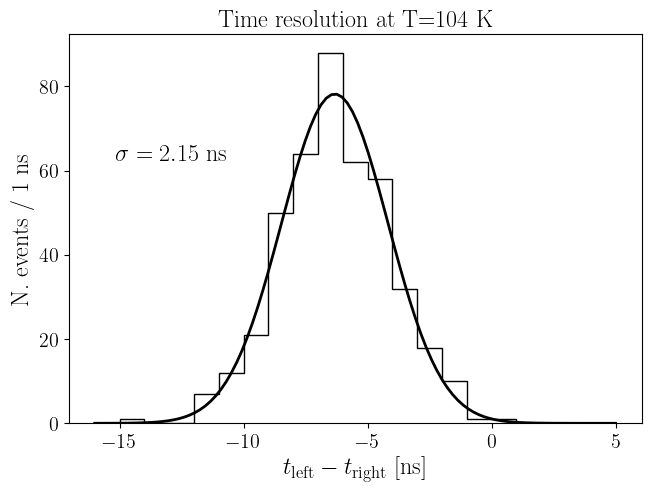

In [14]:
time_diff_cold = left_times_cold-right_times_cold
fig, ax = plt.subplots(1,1,constrained_layout=True)
n, bins, patches = ax.hist(time_diff_cold*1e9,
                           bins=np.linspace(-16,5,22),
                           histtype='step',
                           color='k')
bin_centers = (bins[:-1] + bins[1:]) / 2
popt_time, pcov_time = curve_fit(
    crysp.gauss,
    bin_centers,
    n,
    p0=(150, -5, 0.5),
)
xx = np.linspace(-16, 5, 100)
ax.plot(xx, crysp.gauss(xx, *popt_time),c='k')
ax.text(popt_time[1]*2.4, popt_time[0]*0.8, rf"$\sigma={popt_time[2]:.2f}$ ns", fontsize='xx-large')
ax.set_xlabel(r"$t_{\mathrm{left}}-t_{\mathrm{right}}$ [ns]")
ax.set_ylabel(f"N. events / {bins[1]-bins[0]:.2g} ns")
# ax.set_xlim(-14,-1)
ax.set_title("Time resolution at T=104 K")

## Single crystal spectrum

In [32]:
time_single, single_crystal = crysp.read_single_crystal("../voltage_study/na22_20230726_597v.zip", ticks_column=1)

In [270]:
baselines_single = np.average(single_crystal[:, :500], axis=1)[:, None]
integral_single = -np.trapz(
    (single_crystal)[:, time_single > -0.5e-3], x=time_single[time_single > -0.5e-3]
)

Text(0, 0.5, 'N. events / 1.3e-08 keV')

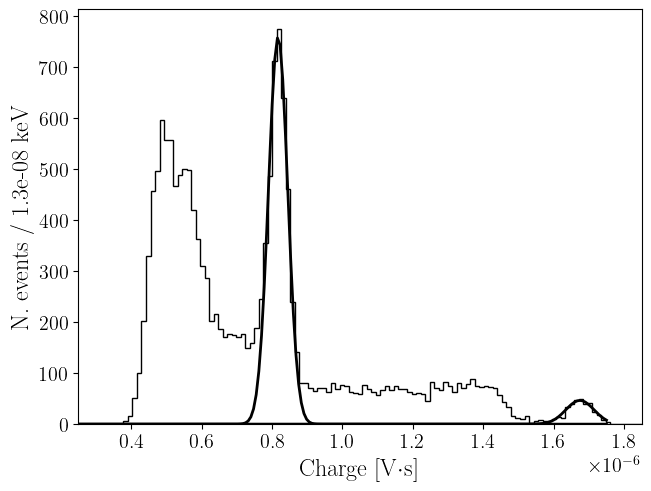

In [272]:
fig, ax = plt.subplots(1, 1,constrained_layout=True)
n_single, bins, patches = ax.hist(
    integral_single, bins=125, range=(0.25e-6, 1.85e-6), histtype="step", color="k"
)
bin_centers = (bins[:-1] + bins[1:]) / 2

popt_single, pcov_single = curve_fit(
    crysp.gauss,
    bin_centers[(bin_centers>0.77e-6)&(bin_centers<0.86e-6)],
    n_single[(bin_centers>0.77e-6)&(bin_centers<0.86e-6)],
    p0=(600,  0.75e-6, 0.1e-6),
)
xx = np.linspace(0.25e-6, 1.75e-6, 200)
ax.plot(xx, crysp.gauss(xx, *popt_single),c='k')

popt_gamma, pcov_gamma = curve_fit(
    crysp.gauss,
    bin_centers[(bin_centers>1.5e-6)&(bin_centers<1.7e-6)],
    n_single[(bin_centers>1.5e-6)&(bin_centers<1.7e-6)],
    p0=(600,  1.6e-6, 0.1e-6),
)
ax.plot(xx, crysp.gauss(xx, *popt_gamma),c='k')
ax.set_xlim(0.25e-6, 1.85e-6)
ax.set_xlabel(r"Charge [V$\cdot$s]")
ax.set_ylabel(f"N. events / {bins[1]-bins[0]:.2g} keV")

In [273]:
m = (popt_gamma[1]-popt_single[1])/(1275-511)
q = (1275*popt_single[1]-511*popt_gamma[1])/(1275-511)

Text(0.5, 1.0, '$^{22}$Na spectrum')

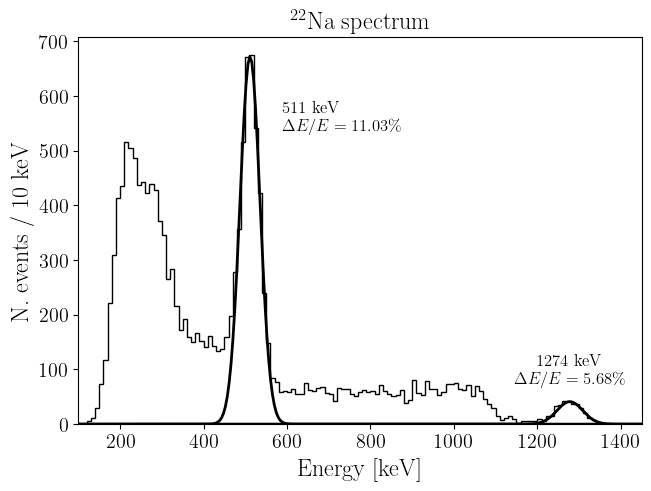

In [274]:
single_energy = (integral_single - q) / m
fig, ax  = plt.subplots(1,1,constrained_layout=True)
n_single, bins, patches = ax.hist(
    single_energy, bins=135, range=(100,1450), histtype="step", color="k"
)
bin_centers = (bins[:-1] + bins[1:]) / 2

popt_single_energy, pcov_single_energy = curve_fit(
    crysp.gauss,
    bin_centers[(bin_centers>490)&(bin_centers<560)],
    n_single[(bin_centers>490)&(bin_centers<560)],
    p0=(600, 511, 50),
)
xx = np.linspace(100, 1450, 300)
ax.plot(xx, crysp.gauss(xx, *popt_single_energy),c='k')
ax.set_xlim(100,1450)

popt_gamma_energy, pcov_gamma_energy = curve_fit(
    crysp.gauss,
    bin_centers[(bin_centers>1270)&(bin_centers<1400)],
    n_single[(bin_centers>1270)&(bin_centers<1400)],
    p0=(600, 1275, 50),
)
ax.plot(xx, crysp.gauss(xx, *popt_gamma_energy),c='k')
ax.text(
    popt_single_energy[1] * 1.15,
    popt_single_energy[0] * 0.8,
    f"511 keV\n$\Delta E/E={2.355*popt_single_energy[2]/popt_single_energy[1]*100:.2f}$\%%",
    horizontalalignment="left",
    fontsize='large'
)

ax.text(
    popt_gamma_energy[1],
    popt_gamma_energy[0] * 1.8,
    f"1274 keV\n$\Delta E/E={2.355*popt_gamma_energy[2]/popt_gamma_energy[1]*100:.2f}$\%%",
    horizontalalignment="center",
    fontsize='large'
)
ax.set_xlabel("Energy [keV]")
ax.set_ylabel(f"N. events / {bins[1]-bins[0]:.2g} keV")
ax.set_title("$^{22}$Na spectrum")
# ax.axvline(550)
# ax.axvline(490)